# Deep Learning with PyTorch: A 60 Minute Blitz [[ref]](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)



## Goal of this tutorial:

- Understand PyTorch’s Tensor library and neural networks at a high level.
- Train a small neural network to classify images

In [1]:
from __future__ import print_function
import torch


In [2]:
# Construct a 5x3 matrix, uninitialized:
x = torch.Tensor(5, 3)
print(x)


 2.2440e-37  0.0000e+00  6.8161e-31
 4.5855e-41  7.0364e-34  4.5855e-41
 1.0676e-37  0.0000e+00  1.0676e-37
 0.0000e+00  1.5489e-31  4.5855e-41
 6.2625e+22  4.7428e+30  0.0000e+00
[torch.FloatTensor of size 5x3]



In [3]:
# Construct a randomly initialized matrix
x = torch.rand(5, 3)
print(x)


 0.5193  0.7615  0.8335
 0.4629  0.8327  0.0330
 0.5776  0.4381  0.0953
 0.3014  0.8335  0.9165
 0.3796  0.0803  0.3196
[torch.FloatTensor of size 5x3]



In [5]:
# Get its size
print(x.size())

torch.Size([5, 3])


In [8]:
#There are multiple syntaxes for operations. Let’s see addition as an example

# Addition: syntax 1
y = torch.rand(5, 3)
print(x + y)

# Addition: syntax 2
print(torch.add(x, y))

# Addition: giving an output tensor
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)

# Addition: in-place (y is changed)
# adds x to y
y.add_(x)
print(y)



 1.2481  1.6951  1.3581
 0.6027  1.2992  0.3485
 1.5403  0.5247  0.6924
 0.4728  1.6382  1.8852
 0.7324  0.6038  0.4146
[torch.FloatTensor of size 5x3]


 1.2481  1.6951  1.3581
 0.6027  1.2992  0.3485
 1.5403  0.5247  0.6924
 0.4728  1.6382  1.8852
 0.7324  0.6038  0.4146
[torch.FloatTensor of size 5x3]


 1.2481  1.6951  1.3581
 0.6027  1.2992  0.3485
 1.5403  0.5247  0.6924
 0.4728  1.6382  1.8852
 0.7324  0.6038  0.4146
[torch.FloatTensor of size 5x3]


 1.2481  1.6951  1.3581
 0.6027  1.2992  0.3485
 1.5403  0.5247  0.6924
 0.4728  1.6382  1.8852
 0.7324  0.6038  0.4146
[torch.FloatTensor of size 5x3]



Any operation that mutates a tensor in-place is post-fixed

with an _ For example: x.copy_(y), x.t_(), will change x.

In [9]:
# You can use standard numpy-like indexing with all bells and whistles!
print(x[:, 1])


 0.7615
 0.8327
 0.4381
 0.8335
 0.0803
[torch.FloatTensor of size 5]



## Converting torch Tensor to numpy Array

In [11]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

[ 1.  1.  1.  1.  1.]


In [12]:
#See how the numpy array changed in value.
# it's interesting , tensor and numpy share address

a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [13]:
#Converting numpy Array to torch Tensor
#See how changing the np array changed the torch Tensor automatically

import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



## CUDA Tensors
 Tensors can be moved onto GPU using the .cuda function.

In [15]:
# let us run this cell only if CUDA is available
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    print(x + y)


 1.7674  2.4566  2.1915
 1.0657  2.1320  0.3814
 2.1179  0.9628  0.7877
 0.7742  2.4717  2.8016
 1.1121  0.6841  0.7342
[torch.cuda.FloatTensor of size 5x3 (GPU 0)]



# Variable

In [18]:
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

# add 2
y = x + 2
print(y)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [23]:
# x without creator
print(x.creator)
# y with creator AddConstant
print(y.creator)

z = y * y * 3
out = z.mean()

print(z, out)

None
Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



# BackWard gradient

In [24]:
# calculate out backward
out.backward()


$$z_i = {3(x_i+2)}^2$$ , $$out=\frac{1}{4} \sum_{i=1}^n z_i$$

In [26]:
# this is partial out/ partial xi
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [28]:
# A more crazy example
# y= x * 2^n , dy/dx = 2^n.

x = torch.randn(3)
x = Variable(x, requires_grad=True)
print (x)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
 1.1441
-0.5892
-0.1876
[torch.FloatTensor of size 3]

Variable containing:
 1171.6028
 -603.3302
 -192.1049
[torch.FloatTensor of size 3]

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



# Neural Networks


In [29]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [30]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [36]:
# Foward
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
 0.0523 -0.0022  0.0186 -0.0343  0.0904 -0.0622  0.1154  0.0328 -0.0713  0.0234
[torch.FloatTensor of size 1x10]



## Loss function

In [38]:
output = net(input)
target = Variable(torch.arange(1, 11))  # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 38.3621
[torch.FloatTensor of size 1]



In [61]:
# as same as 
a=((output-target)**2/10)
np.sum(a.data.numpy())

38.362049

In [39]:
# trace the operation pipe line
print(loss.creator)  # MSELoss
print(loss.creator.previous_functions[0][0])  # Linear
print(loss.creator.previous_functions[0][0].previous_functions[0][0])  # ReLU

# Backprop


In [62]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
Variable containing:
-0.0507
-0.0779
 0.0243
 0.1363
-0.0752
 0.0496
[torch.FloatTensor of size 6]



# Update the weights


In [65]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [66]:
# check if loss descenet

output = net(input)
target = Variable(torch.arange(1, 11))  # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 36.1299
[torch.FloatTensor of size 1]



# Training an image classifier
restart session

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  car   dog   cat  bird


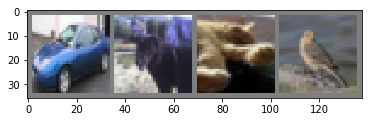

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
# you can see the batch size was controlled by DataLoader.
print images.size()
print labels

torch.Size([4, 3, 32, 32])

 1
 5
 3
 2
[torch.LongTensor of size 4]



In [5]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
# Define a Loss function and optimizer
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.177
[1,  4000] loss: 1.823
[1,  6000] loss: 1.657
[1,  8000] loss: 1.569
[1, 10000] loss: 1.513
[1, 12000] loss: 1.463
[2,  2000] loss: 1.403
[2,  4000] loss: 1.373
[2,  6000] loss: 1.328
[2,  8000] loss: 1.334
[2, 10000] loss: 1.328
[2, 12000] loss: 1.274
Finished Training


# 5. Test the network on the test data


('GroundTruth: ', '  cat  ship  ship plane')


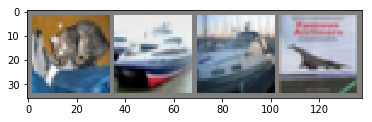

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
# make a prediction
outputs = net(Variable(images))

In [10]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j][0]]
                              for j in range(4)))

('Predicted: ', '  cat   car   car plane')


## check the overall acc , ~56% , better than random : ~10%

In [11]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 55 %
Accuracy of   car : 84 %
Accuracy of  bird : 45 %
Accuracy of   cat : 61 %
Accuracy of  deer : 33 %
Accuracy of   dog : 11 %
Accuracy of  frog : 53 %
Accuracy of horse : 66 %
Accuracy of  ship : 47 %
Accuracy of truck : 61 %


# Training on GPU


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=512,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=512,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable

class Block(nn.Module):
    '''Depthwise conv + Pointwise conv'''
    def __init__(self, in_planes, out_planes, stride=1):
        super(Block, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, in_planes, kernel_size=3, stride=stride, padding=1, groups=in_planes, bias=False)
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.conv2 = nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn2 = nn.BatchNorm2d(out_planes)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        return out


class MobileNet(nn.Module):
    # (128,2) means conv planes=128, conv stride=2, by default conv stride=1
    cfg = [64, (128,2), 128, (256,2), 256, (512,2), 512, 512, 512, 512, 512, (1024,2), 1024]

    def __init__(self, num_classes=10):
        super(MobileNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.layers = self._make_layers(in_planes=32)
        self.linear = nn.Linear(1024, num_classes)

    def _make_layers(self, in_planes):
        layers = []
        for x in self.cfg:
            out_planes = x if isinstance(x, int) else x[0]
            stride = 1 if isinstance(x, int) else x[1]
            layers.append(Block(in_planes, out_planes, stride))
            in_planes = out_planes
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layers(out)
        out = F.avg_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out
    
    
net = MobileNet()

In [5]:
use_cuda = torch.cuda.is_available()
print use_cuda

True


In [6]:
if use_cuda:
    net.cuda()
    #net = torch.nn.DataParallel(net, device_ids=range(torch.cuda.device_count()))

In [7]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4)

In [8]:
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        if use_cuda:
            inputs, targets = inputs.cuda(), targets.cuda()
        optimizer.zero_grad()
        inputs, targets = Variable(inputs), Variable(targets)
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.data[0]
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
    print("train acc", 1.0*correct/total)
      

In [9]:
def test(epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(testloader):
        if use_cuda:
            inputs, targets = inputs.cuda(), targets.cuda()
        inputs, targets = Variable(inputs, volatile=True), Variable(targets)
        outputs = net(inputs)
        loss = criterion(outputs, targets)

        test_loss += loss.data[0]
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
    print("test acc", 1.0*correct/total)

In [13]:
for epoch in range(1, 10):
    train(epoch)
    test(epoch)


Epoch: 1
('train acc', 0.955)
('test acc', 0.789)

Epoch: 2
('train acc', 0.9567)
('test acc', 0.7943)

Epoch: 3
('train acc', 0.9506)
('test acc', 0.7883)

Epoch: 4


Process Process-485:
Process Process-486:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/stream/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/stream/anaconda2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/home/stream/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/stream/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/home/stream/anaconda2/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 35, in _worker_loop
  File "/home/stream/anaconda2/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 35, in _worker_loop
    r = index_queue.get()
    r = index_queue.get()
  File "/home/stream/anaconda2/lib/python2.7/multiprocessing/queues.py", line 378, in get
  File "/hom

KeyboardInterrupt: 

In [12]:
test(epoch)

('test acc', 0.7888)
